In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [58]:
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)
%matplotlib inline

In [59]:
from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

Loading BokehJS ...

In [60]:
df_1 =pd.read_csv("cleaned_data.csv")

In [61]:
trainDF,testDF = train_test_split(df_1, test_size=0.2)

In [62]:
print('Training data dimensions:',trainDF.shape)
print('Testing data dimensions:',testDF.shape)


Training data dimensions: (14824, 8)
Testing data dimensions: (3706, 8)


In [63]:
trainDF['tenant_id'].unique()

array([   16, 38723,  1165, ..., 25559, 53865,   862])

In [88]:
X=pd.concat([trainDF['lat'],trainDF['lng']],axis=1)
y=trainDF['tenant_id']


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp

In [91]:
X = X.values

In [93]:
y = y.values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [52]:
predVal=neigh.predict(X_test)
mat=[predVal,y_test]
df=pd.DataFrame(mat).transpose()
df.columns=('h0','y')
df['diff']=np.where(df.h0==df.y,1,0)
print('% correct =',sum(df['diff'])/len(df['diff'])*100)

% correct = 0.79721995094


In [104]:
# PredProb=neigh.predict_proba(X_test)
# pred=np.asmatrix(PredProb)
# s=np.asmatrix(pd.get_dummies(y_test))
# def f(x):
#     return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
# f=np.vectorize(f)
# predf=f(pred)
# mult=np.multiply(predf,s)
# print('log loss =',np.sum(mult)/-len(y_test))

In [95]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.721/0.012
k: 3, Train/Test Score: 0.270/0.011
k: 5, Train/Test Score: 0.174/0.013
k: 7, Train/Test Score: 0.138/0.012
k: 9, Train/Test Score: 0.120/0.013
k: 11, Train/Test Score: 0.106/0.012
k: 13, Train/Test Score: 0.098/0.013
k: 15, Train/Test Score: 0.092/0.013
k: 17, Train/Test Score: 0.089/0.014
k: 19, Train/Test Score: 0.084/0.014
k: 21, Train/Test Score: 0.080/0.015
k: 23, Train/Test Score: 0.079/0.014
k: 25, Train/Test Score: 0.077/0.015
k: 27, Train/Test Score: 0.073/0.016
k: 29, Train/Test Score: 0.071/0.015
k: 31, Train/Test Score: 0.069/0.016
k: 33, Train/Test Score: 0.067/0.018
k: 35, Train/Test Score: 0.066/0.019
k: 37, Train/Test Score: 0.065/0.020
k: 39, Train/Test Score: 0.063/0.020
k: 41, Train/Test Score: 0.062/0.020
k: 43, Train/Test Score: 0.061/0.020
k: 45, Train/Test Score: 0.062/0.020
k: 47, Train/Test Score: 0.062/0.020
k: 49, Train/Test Score: 0.061/0.023
k: 51, Train/Test Score: 0.060/0.023
k: 53, Train/Test Score: 0.060/0.022
k: 55,

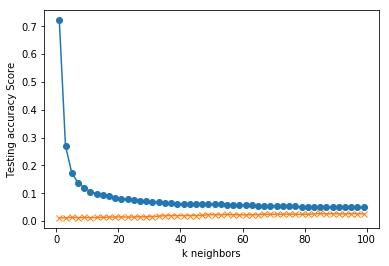

In [105]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [101]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.012
